<a href="https://colab.research.google.com/github/abdinegara783/StaplesPrediction/blob/main/EDA%2BModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Depencences**


K-Neirest-Neighbor Regression
Created by `Abdi Negara Guci` You can Find me on my
[Linkedin](https://www.linkedin.com/in/abdi-negara-guci-24b98b233/) Account



### **Pendahuluan**


---


K-Nearest Neighbors (KNN) Regression adalah metode pembelajaran mesin yang digunakan untuk melakukan prediksi berdasarkan nilai dari k tetangga terdekat dari suatu titik data. Dalam konteks regresi, KNN digunakan untuk memprediksi nilai kontinu berdasarkan nilai-nilai tetangga terdekat.
### **Konsep Dasar**


---


Misalkan $X$ adalah ruang fitur, dan $Y$ adalah variabel respons yang bersifat kontinu. KNN Regression bekerja dengan cara mencari k tetangga terdekat dari suatu titik data uji dalam ruang fitur. Prediksi nilai $Y$ untuk titik data uji kemudian dihitung dengan mengambil rata-rata nilai $Y$ dari k tetangga terdekat tersebut.
Jarak antara titik data uji ($X_{\text{uji}}$) dan titik data latih ($X_{\text{latih}}$) dapat dihitung menggunakan berbagai metrik jarak, seperti Euclidean distance atau Manhattan distance. Jika $d_i$ adalah jarak antara titik data uji dan titik data latih ke-$i$, maka bobot untuk menghitung rata-rata dapat diberikan dengan fungsi kernel, misalnya dengan menggunakan invers dari jarak sebagai bobot:

$\hat{Y}_{\text{uji}} = \frac{\sum_{i=1}^{k} w_i \cdot Y_{\text{latih}_i}}{\sum_{i=1}^{k} w_i}$

di mana $w_i$ adalah bobot untuk titik data latih ke-$i$, yang dapat dihitung sebagai $w_i = \frac{1}{d_i}$.
### **Parameter $K$**


---


Satu parameter penting dalam KNN Regression adalah jumlah tetangga terdekat $k$ yang harus dipertimbangkan. Memilih nilai $k$ yang tepat dapat mempengaruhi kinerja model. Nilai $k$ yang terlalu kecil dapat menyebabkan model menjadi terlalu sensitif terhadap noise, sedangkan nilai $k$ yang terlalu besar dapat menyebabkan model menjadi terlalu kasar.



**K-Neirest Neighbor**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
data = pd.read_excel('/content/Data_Rizky.xlsx')

In [ ]:
data

,Komuditas,JAN,FEB,MAR,APR,MEI,JUN,JUL,AGUST,SEP,OKT,NOV,DES
0,Beras,10.1250,10.3440,10.063,9.688,9.750,9.750,10.250,9.850,10.500,10.25,10.250,10.250
1,Membramo,10.0000,10.0000,10.000,10.000,10.000,10.000,10.000,9.200,10.000,10.00,10.000,10.000
2,Cinta Nur,10.5000,11.0000,11.000,10.500,10.000,10.000,10.500,10.500,11.000,10.50,10.500,10.500
3,Super Win,10.2500,10.5000,10.250,10.250,10.000,10.000,10.500,10.500,11.000,10.50,10.500,10.500
4,Santana,9.7500,9.8750,9.000,8.000,9.000,9.000,10.000,9.200,10.000,10.00,10.000,10.000
5,Kacang Tanah,28.5000,27.5000,27.250,29.000,29.000,32.000,30.000,31.200,29.000,28.50,28.000,28.000
6,Bawang Merah,30.8750,31.5000,35.500,28.250,29.500,60.500,62.500,47.000,32.500,29.00,38.000,40.000
7,Bawang Putih,28.0000,29.0000,32.000,33.000,29.000,24.000,24.000,23.000,24.250,21.00,20.000,25.000
8,Cabe,33.3330,39.0000,45.500,42.500,33.833,51.667,44.833,49.533,39.833,32.50,32.000,33.917
9,Cabe Merah Besar,33.7500,44.5000,44.250,52.500,45.000,50.000,43.750,55.000,35.000,35.00,50.000,50.000


In [ ]:
df = data.copy()

In [ ]:
df.shape

(24, 13)

In [ ]:
df.describe()

,JAN,FEB,MAR,APR,MEI,JUN,JUL,AGUST,SEP,OKT,NOV,DES
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,27.262312,29.850271,32.098458,33.491167,31.446167,36.126750,33.231583,33.010125,30.131583,27.754167,28.792708,29.856958
std,20.664961,22.776871,24.622370,25.352909,25.188675,27.339048,26.528470,26.933401,25.602851,24.076824,25.098596,25.383356
min,8.500000,5.500000,4.000000,7.250000,9.000000,9.000000,10.000000,8.000000,4.750000,4.250000,5.000000,8.000000
25%,12.750000,13.250000,13.250000,13.125000,13.625000,15.750000,13.125000,13.125000,13.062500,13.125000,13.125000,12.937500
50%,28.237500,28.250000,29.125000,28.625000,27.250000,28.750000,28.200000,28.720000,27.900000,23.700000,22.800000,25.300000
75%,34.062500,38.531250,42.000000,40.625000,35.468750,50.416750,44.020750,46.250000,36.208250,35.050000,34.100000,38.500000
max,110.000000,110.000000,117.500000,120.000000,125.000000,130.000000,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000


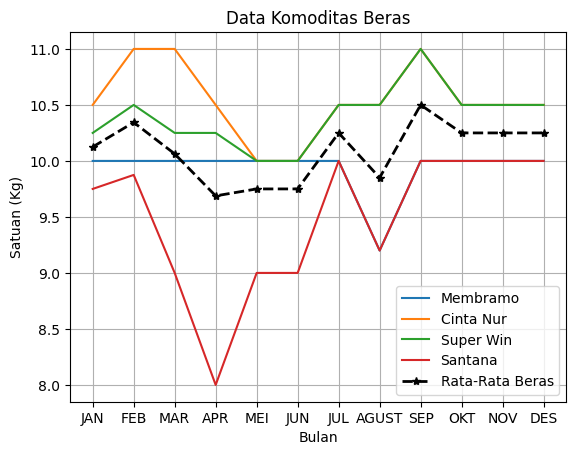

In [ ]:
# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[1,1:].values, label='Membramo')
plt.plot(df.columns[1:], df.iloc[2,1:].values, label='Cinta Nur')
plt.plot(df.columns[1:], df.iloc[3,1:].values, label='Super Win')
plt.plot(df.columns[1:], df.iloc[4,1:].values, label='Santana')

# Plot komoditas beras secara keseluruhan
plt.plot(df.columns[1:], df.iloc[0,1:].values, label='Rata-Rata Beras', linestyle='--', marker='*', linewidth=2, color='black')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Komoditas Beras')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

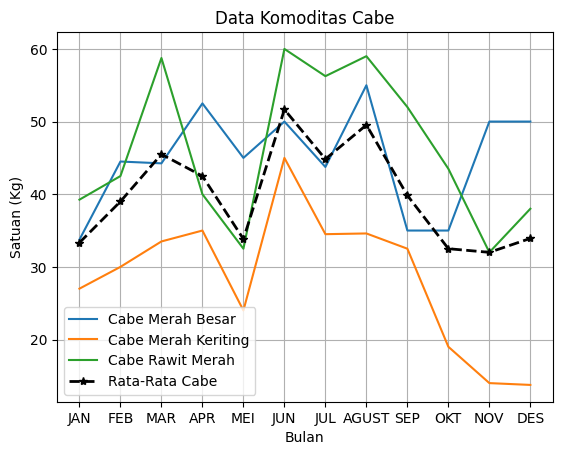

In [ ]:
# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[9,1:].values, label='Cabe Merah Besar')
plt.plot(df.columns[1:], df.iloc[10,1:].values, label='Cabe Merah Keriting')
plt.plot(df.columns[1:], df.iloc[11,1:].values, label='Cabe Rawit Merah')

# Plot komoditas beras secara keseluruhan
plt.plot(df.columns[1:], df.iloc[8,1:].values, label='Rata-Rata Cabe', linestyle='--', marker='*', linewidth=2, color='black')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Komoditas Cabe')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

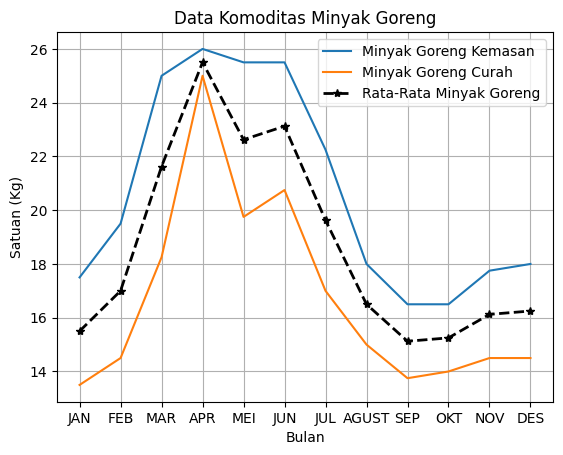

In [ ]:
# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[14,1:].values, label='Minyak Goreng Kemasan')
plt.plot(df.columns[1:], df.iloc[15,1:].values, label='Minyak Goreng Curah')

# Plot komoditas beras secara keseluruhan
plt.plot(df.columns[1:], df.iloc[13,1:].values, label='Rata-Rata Minyak Goreng', linestyle='--', marker='*', linewidth=2, color='black')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Komoditas Minyak Goreng')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

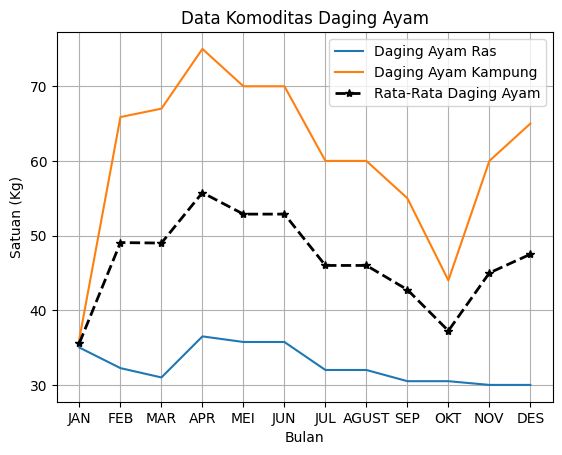

In [ ]:
# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[18,1:].values, label='Daging Ayam Ras')
plt.plot(df.columns[1:], df.iloc[19,1:].values, label='Daging Ayam Kampung')

# Plot komoditas beras secara keseluruhan
plt.plot(df.columns[1:], df.iloc[17,1:].values, label='Rata-Rata Daging Ayam', linestyle='--', marker='*', linewidth=2, color='black')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Komoditas Daging Ayam')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

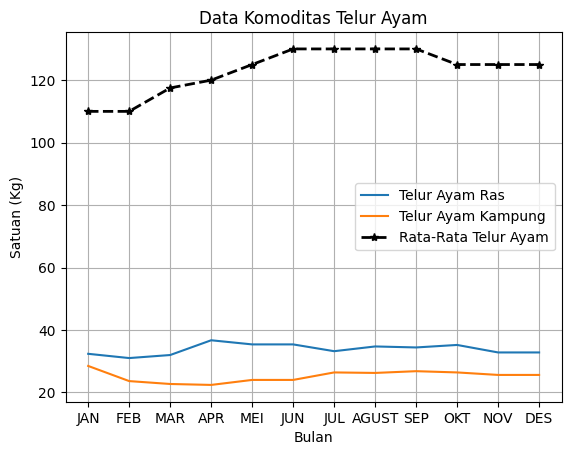

In [ ]:
# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[21,1:].values, label='Telur Ayam Ras')
plt.plot(df.columns[1:], df.iloc[22,1:].values, label='Telur Ayam Kampung')

# Plot komoditas beras secara keseluruhan
plt.plot(df.columns[1:], df.iloc[20,1:].values, label='Rata-Rata Telur Ayam', linestyle='--', marker='*', linewidth=2, color='black')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Komoditas Telur Ayam')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

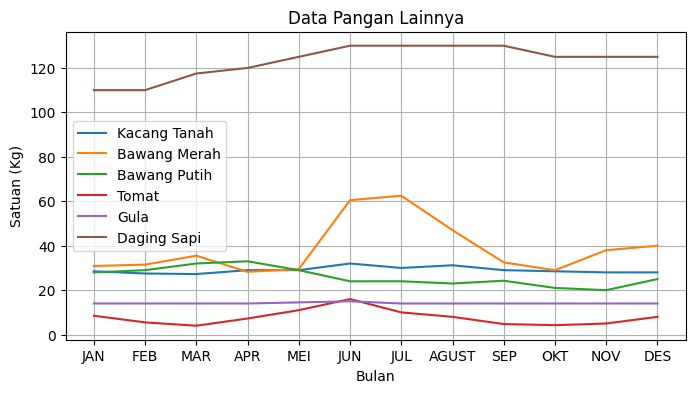

In [ ]:
# Lebarkan kanvas
plt.figure(figsize=(8, 4))

# Plot semua komoditas kecuali beras
plt.plot(df.columns[1:], df.iloc[5,1:].values, label='Kacang Tanah')
plt.plot(df.columns[1:], df.iloc[6,1:].values, label='Bawang Merah')
plt.plot(df.columns[1:], df.iloc[7,1:].values, label='Bawang Putih')
plt.plot(df.columns[1:], df.iloc[12,1:].values, label='Tomat')
plt.plot(df.columns[1:], df.iloc[16,1:].values, label='Gula')
plt.plot(df.columns[1:], df.iloc[20,1:].values, label='Daging Sapi')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Satuan (Kg)')
plt.title('Data Pangan Lainnya')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


<ipython-input-14-3c348d9e73d3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


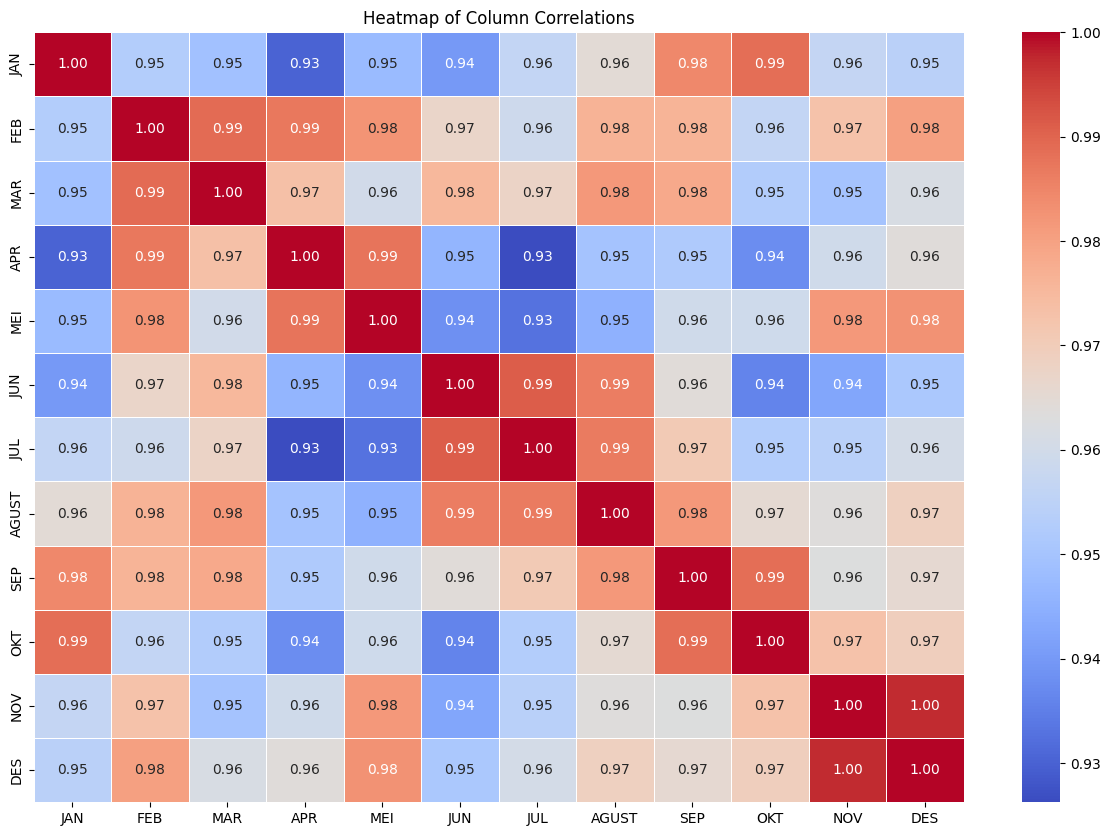

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_heatmap(df):
    # Menghitung matriks korelasi
    correlation_matrix = df.corr()

    # Menentukan ukuran gambar
    plt.figure(figsize=(15, 10))

    # Menampilkan heatmap
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

    # Menyesuaikan tata letak
    plt.title('Heatmap of Column Correlations')
    plt.show()

# Panggil fungsi untuk menampilkan heatmap
visualize_heatmap(df)


# **Normalisasi Data**

In [ ]:
df=data.copy()

In [ ]:
# Menghilangkan kolom 'Komuditas' dari DataFrame sebelum normalisasi
komuditas = df['Komuditas']
df = df.drop(['Komuditas','DES'], axis=1)

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menambahkan kembali kolom 'Komuditas' ke DataFrame hasil normalisasi
df_normalized.insert(0, 'Komuditas', komuditas)

# Menampilkan hasil normalisasi
print("Data Setelah Normalisasi:")
df_normalized

Data Setelah Normalisasi:


,Komuditas,JAN,FEB,MAR,APR,MEI,JUN,JUL,AGUST,SEP,OKT,NOV
0,Beras,0.016010,0.046354,0.053419,0.021623,0.006466,0.006198,0.002083,0.015164,0.045908,0.049689,0.043750
1,Membramo,0.014778,0.043062,0.052863,0.024390,0.008621,0.008264,0.000000,0.009836,0.041916,0.047619,0.041667
2,Cinta Nur,0.019704,0.052632,0.061674,0.028825,0.008621,0.008264,0.004167,0.020492,0.049900,0.051760,0.045833
3,Super Win,0.017241,0.047847,0.055066,0.026608,0.008621,0.008264,0.004167,0.020492,0.049900,0.051760,0.045833
4,Santana,0.012315,0.041866,0.044053,0.006652,0.000000,0.000000,0.000000,0.009836,0.041916,0.047619,0.041667
5,Kacang Tanah,0.197044,0.210526,0.204846,0.192905,0.172414,0.190083,0.166667,0.190164,0.193613,0.200828,0.191667
6,Bawang Merah,0.220443,0.248804,0.277533,0.186253,0.176724,0.425620,0.437500,0.319672,0.221557,0.204969,0.275000
7,Bawang Putih,0.192118,0.224880,0.246696,0.228381,0.172414,0.123967,0.116667,0.122951,0.155689,0.138716,0.125000
8,Cabe,0.244660,0.320574,0.365639,0.312639,0.214078,0.352620,0.290275,0.340434,0.280104,0.233954,0.225000
9,Cabe Merah Besar,0.248768,0.373206,0.354626,0.401330,0.310345,0.338843,0.281250,0.385246,0.241517,0.254658,0.375000


In [ ]:
# Pisahkan fitur dan target
X = df_normalized.drop(['Komuditas'], axis=1)
y = data['DES']

In [ ]:
X =np.array(X)
y =np.array(y)

In [ ]:
# Bagi data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=9)  # Anda dapat mengganti nilai neighbors sesuai kebutuhan

In [ ]:
# Melatih model
knn_model.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred = knn_model.predict(X_test)

# Menghitung MAPE
mape = mean_absolute_error(y_test, y_pred) / abs(y_test.mean()) * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 3.48%


In [ ]:
import numpy as np

class KNeighborsRegressorScratch:
    def __init__(self, n_neighbors=9):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.mean(nearest_labels))
        return np.array(y_pred)

# Contoh penggunaan
knn_model_scratch = KNeighborsRegressorScratch(n_neighbors=9)
knn_model_scratch.fit(X_train, y_train)
y_pred_scratch = knn_model_scratch.predict(X_test)

# Menghitung MAPE
mape_scratch = mean_absolute_error(y_test, y_pred_scratch) / abs(y_test.mean()) * 100
print(f'MAPE: {mape_scratch:.2f}%')


MAPE: 3.48%


# **ukuran Perubahan jarak**

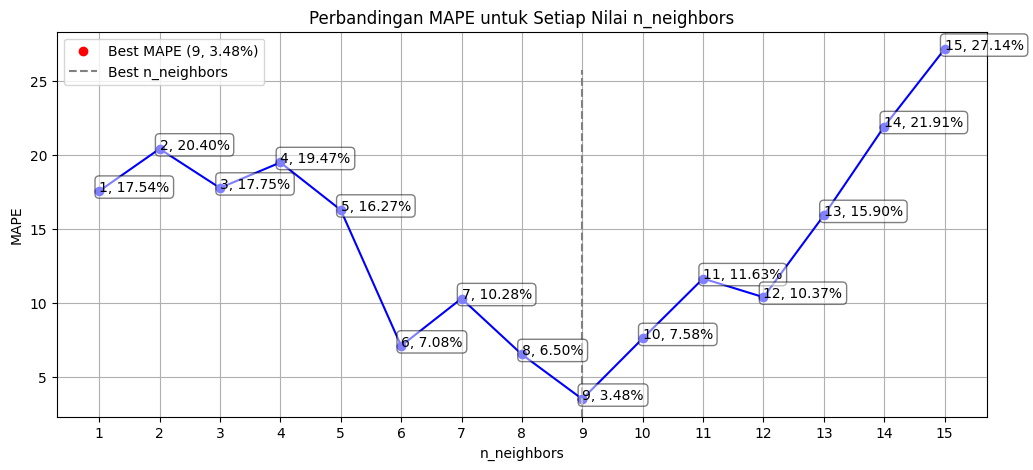

In [ ]:
# Inisialisasi model KNN Regression
knn_model = KNeighborsRegressor()

# Tentukan range nilai n_neighbors yang akan diuji
n_neighbors_range = range(1, 16)

# List untuk menyimpan nilai MAPE untuk setiap n_neighbors
mape_values = []

# Loop untuk mencari nilai MAPE untuk setiap n_neighbors
for n_neighbors in n_neighbors_range:
    # Inisialisasi model dengan nilai n_neighbors tertentu
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Melatih model
    knn_model.fit(X_train, y_train)

    # Melakukan prediksi pada data test
    y_pred = knn_model.predict(X_test)

    # Menghitung MAPE
    mape = mean_absolute_error(y_test, y_pred) / abs(y_test.mean()) * 100

    # Menyimpan nilai MAPE
    mape_values.append(mape)

# Temukan nilai n_neighbors dengan MAPE terendah
best_n_neighbors = n_neighbors_range[np.argmin(mape_values)]
min_mape_value = min(mape_values)

# Plot hasil dengan menandai titik dengan MAPE terendah dan garis vertikal
plt.figure(figsize=(12, 5))
plt.plot(n_neighbors_range, mape_values, marker='o', linestyle='-', color='b')
plt.scatter(best_n_neighbors, min_mape_value, color='red', label=f'Best MAPE ({best_n_neighbors}, {min_mape_value:.2f}%)')
plt.axvline(x=best_n_neighbors, linestyle='--', color='gray', label='Best n_neighbors', ymax=0.9)
plt.title('Perbandingan MAPE untuk Setiap Nilai n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('MAPE')
plt.xticks(n_neighbors_range)
plt.legend()
plt.grid(True)

# Tambahkan label pada setiap titik
for n_neighbors, mape in zip(n_neighbors_range, mape_values):
    plt.annotate(f'{n_neighbors}, {mape:.2f}%', (n_neighbors, mape), bbox=dict(boxstyle='round', fc='w', alpha=0.5))

plt.show()

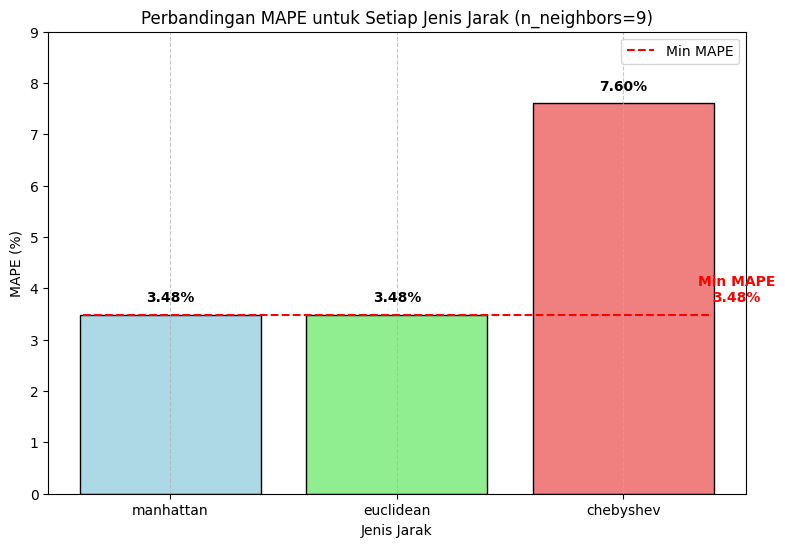

In [ ]:
# Inisialisasi model KNN Regression
n_neighbors = 9

# List untuk menyimpan nilai MAPE untuk setiap jenis jarak
distance_metrics = ['manhattan', 'euclidean', 'chebyshev']
mape_values = []

# Loop untuk mencari nilai MAPE untuk setiap jenis jarak
for metric in distance_metrics:
    # Inisialisasi model dengan jenis jarak tertentu
    if metric == 'mahalanobis':
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric, metric_params={'V': X_train.cov()})
    else:
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric)

    # Melatih model
    knn_model.fit(X_train, y_train)

    # Melakukan prediksi pada data test
    y_pred = knn_model.predict(X_test)

    # Menghitung MAPE
    mape = mean_absolute_error(y_test, y_pred) / abs(y_test.mean()) * 100

    # Menyimpan nilai MAPE
    mape_values.append(mape)

# Plot hasil dengan bar plot horizontal yang lebih dipoles
plt.figure(figsize=(9, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.bar(distance_metrics, mape_values, color=colors, edgecolor='black')
plt.xlabel('Jenis Jarak')
plt.ylabel('MAPE (%)')
plt.ylim(0,9)
plt.title(f'Perbandingan MAPE untuk Setiap Jenis Jarak (n_neighbors={n_neighbors})')

# Menambahkan label pada batang diagram
for i, mape_value in enumerate(mape_values):
    plt.text(i, mape_value + 0.2, f'{mape_value:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

# Menambahkan garis horizontal pada nilai MAPE terendah
min_mape_index = mape_values.index(min(mape_values))
plt.axhline(y=min(mape_values), linestyle='--', color='red', label='Min MAPE', xmin=0.05, xmax=0.95)

# Menambahkan label pada garis horizontal
plt.text(2.5, min(mape_values) + 0.2, f'Min MAPE\n{min(mape_values):.2f}%', ha='center', va='bottom', color='red', fontweight='bold')

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


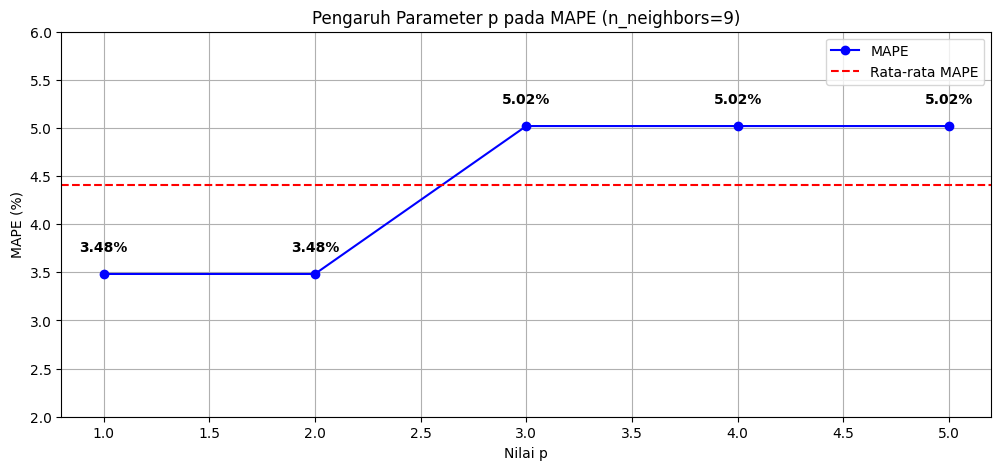

In [ ]:
# Inisialisasi model KNN Regression
n_neighbors = 9

# List untuk menyimpan nilai MAPE untuk setiap nilai p
p_values = range(1, 6)
mape_values = []

# Loop untuk mencari nilai MAPE untuk setiap nilai p
for p in p_values:
    # Inisialisasi model dengan nilai p tertentu
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, p=p)

    # Melatih model
    knn_model.fit(X_train, y_train)

    # Melakukan prediksi pada data test
    y_pred = knn_model.predict(X_test)

    # Menghitung MAPE
    mape = mean_absolute_error(y_test, y_pred) / abs(y_test.mean()) * 100

    # Menyimpan nilai MAPE
    mape_values.append(mape)

# Plot hasil dengan garis rata-rata dan label
plt.figure(figsize=(12, 5))
plt.plot(p_values, mape_values, marker='o', linestyle='-', color='b', label='MAPE')
plt.axhline(y=np.mean(mape_values), linestyle='--', color='r', label='Rata-rata MAPE', xmin=0, xmax=1)
plt.title(f'Pengaruh Parameter p pada MAPE (n_neighbors={n_neighbors})')
plt.xlabel('p')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)

# Menambahkan label pada titik data
for i, mape_value in enumerate(mape_values):
    plt.text(p_values[i], mape_value+0.2 , f'{mape_value:.2f}%', ha='center', va='bottom', fontweight='bold')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Nilai p')
plt.ylabel('MAPE (%)')
plt.ylim(2,6)

plt.show()


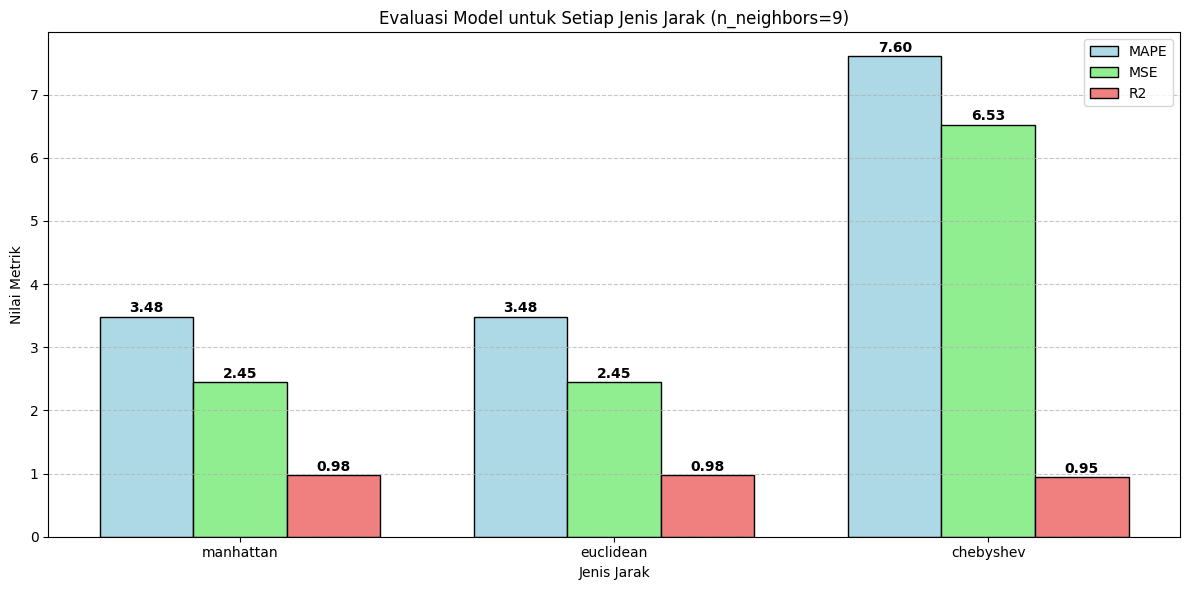

In [ ]:
from sklearn.metrics import r2_score
# Inisialisasi model KNN Regression
n_neighbors = 9

# List untuk menyimpan nilai metrik evaluasi untuk setiap jenis jarak
distance_metrics = ['manhattan', 'euclidean', 'chebyshev']
evaluation_metrics = {'MAPE': [], 'MSE': [], 'R2': []}

# Loop untuk mencari nilai metrik evaluasi untuk setiap jenis jarak
for metric in distance_metrics:
    # Inisialisasi model dengan jenis jarak tertentu
    if metric == 'mahalanobis':
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric, metric_params={'V': X_train.cov()})
    else:
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric)

    # Melatih model
    knn_model.fit(X_train, y_train)

    # Melakukan prediksi pada data test
    y_pred = knn_model.predict(X_test)

    # Menghitung metrik evaluasi
    mape = mean_absolute_error(y_test, y_pred) / abs(y_test.mean()) * 100
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan nilai metrik evaluasi
    evaluation_metrics['MAPE'].append(mape)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['R2'].append(r2)

# Plot hasil dengan bar plot
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = range(len(distance_metrics))

# Plot MAPE
plt.bar(index, evaluation_metrics['MAPE'], color='lightblue', edgecolor='black', width=bar_width, label='MAPE')

# Plot MSE
plt.bar([i + bar_width for i in index], evaluation_metrics['MSE'], color='lightgreen', edgecolor='black', width=bar_width, label='MSE')

# Plot R2
plt.bar([i + 2 * bar_width for i in index], evaluation_metrics['R2'], color='lightcoral', edgecolor='black', width=bar_width, label='R2')

# Menambahkan label pada batang diagram
all_metrics = ['MAPE', 'MSE', 'R2']
all_values = [evaluation_metrics['MAPE'], evaluation_metrics['MSE'], evaluation_metrics['R2']]

for metric, values in zip(all_metrics, all_values):
    for i, value in zip(index, values):
        plt.text(i + bar_width * all_metrics.index(metric), value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.xlabel('Jenis Jarak')
plt.ylabel('Nilai Metrik')
plt.title(f'Evaluasi Model untuk Setiap Jenis Jarak (n_neighbors={n_neighbors})')
plt.xticks([i + bar_width for i in index], distance_metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
